In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + "149d1203e47d53208fd47e0b4e18b15c"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=149d1203e47d53208fd47e0b4e18b15c


In [3]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | sao miguel do araguaia
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | newala
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | pandan
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | qaqortoq
Process

Processing Record 41 of Set 4 | cornwall
Processing Record 42 of Set 4 | ranong
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | bluff
Processing Record 45 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 46 of Set 4 | meyungs
City not found. Skipping...
Processing Record 47 of Set 4 | umba
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | duluth
Processing Record 50 of Set 4 | guangshui
Processing Record 1 of Set 5 | sarkand
Processing Record 2 of Set 5 | wajima
Processing Record 3 of Set 5 | ostrovnoy
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | la ronge
Processing Record 6 of Set 5 | jacareacanga
Processing Record 7 of Set 5 | grand centre
City not found. Skipping...
Processing Record 8 of Set 5 | port blair
Processing Record 9 of Set 5 | port shepstone
Processing Record 10 of Set 5 | juneau
Processing Record 11 of Set 5 | hihifo
City not found. Skipping...
Processing Record 12 of Set 5 | puer

City not found. Skipping...
Processing Record 23 of Set 8 | nicoya
Processing Record 24 of Set 8 | san felipe
Processing Record 25 of Set 8 | longyearbyen
Processing Record 26 of Set 8 | santiago
Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | taoudenni
Processing Record 29 of Set 8 | bull savanna
Processing Record 30 of Set 8 | kamenka
Processing Record 31 of Set 8 | srednekolymsk
Processing Record 32 of Set 8 | kuah
Processing Record 33 of Set 8 | rypefjord
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | guozhen
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | bahia blanca
Processing Record 39 of Set 8 | acapulco
Processing Record 40 of Set 8 | aranos
Processing Record 41 of Set 8 | touros
Processing Record 42 of Set 8 | tidore
City not found. Skipping...
Processing Record 43 of Set 8 | kiunga
Processing Record 44 of Set 8 | mount isa
Processing Record 45 of Set 8 | rawson
Pr

Processing Record 11 of Set 12 | lieto
Processing Record 12 of Set 12 | manggar
Processing Record 13 of Set 12 | northam
Processing Record 14 of Set 12 | markala
Processing Record 15 of Set 12 | iquique
Processing Record 16 of Set 12 | dong xoai
Processing Record 17 of Set 12 | saleaula
City not found. Skipping...
Processing Record 18 of Set 12 | krasnyy chikoy
Processing Record 19 of Set 12 | atemar
Processing Record 20 of Set 12 | hay river
Processing Record 21 of Set 12 | edd
Processing Record 22 of Set 12 | teya
Processing Record 23 of Set 12 | mogochin
City not found. Skipping...
Processing Record 24 of Set 12 | vila velha
Processing Record 25 of Set 12 | leeton
Processing Record 26 of Set 12 | necochea
Processing Record 27 of Set 12 | talaja
Processing Record 28 of Set 12 | weifang
Processing Record 29 of Set 12 | yazoo city
Processing Record 30 of Set 12 | satitoa
City not found. Skipping...
Processing Record 31 of Set 12 | atikokan
Processing Record 32 of Set 12 | pitimbu
Proce

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.60,78,99,13.22,PF,2022-05-19 17:40:55
1,Pevek,69.7008,170.3133,31.59,99,100,2.53,RU,2022-05-19 17:37:15
2,Port Alfred,-33.5906,26.8910,60.19,95,95,5.01,ZA,2022-05-19 17:40:55
3,Thompson,55.7435,-97.8558,39.36,52,75,13.80,CA,2022-05-19 17:40:55
4,Khatanga,71.9667,102.5000,21.61,93,95,7.52,RU,2022-05-19 17:40:56
5,Monrovia,6.3005,-10.7969,81.39,79,83,7.14,LR,2022-05-19 17:37:56
6,Talnakh,69.4865,88.3972,33.21,91,87,4.81,RU,2022-05-19 17:40:56
7,Ushuaia,-54.8000,-68.3000,55.02,76,20,2.30,AR,2022-05-19 17:40:57
8,Bengkulu,-3.8004,102.2655,76.35,88,65,3.27,ID,2022-05-19 17:40:57
9,Sao Miguel Do Araguaia,-13.2750,-50.1628,78.62,19,55,8.21,BR,2022-05-19 17:40:58


In [10]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]


In [11]:
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-05-19 17:40:55,-23.1203,-134.9692,76.60,78,99,13.22
1,Pevek,RU,2022-05-19 17:37:15,69.7008,170.3133,31.59,99,100,2.53
2,Port Alfred,ZA,2022-05-19 17:40:55,-33.5906,26.8910,60.19,95,95,5.01
3,Thompson,CA,2022-05-19 17:40:55,55.7435,-97.8558,39.36,52,75,13.80
4,Khatanga,RU,2022-05-19 17:40:56,71.9667,102.5000,21.61,93,95,7.52
5,Monrovia,LR,2022-05-19 17:37:56,6.3005,-10.7969,81.39,79,83,7.14
6,Talnakh,RU,2022-05-19 17:40:56,69.4865,88.3972,33.21,91,87,4.81
7,Ushuaia,AR,2022-05-19 17:40:57,-54.8000,-68.3000,55.02,76,20,2.30
8,Bengkulu,ID,2022-05-19 17:40:57,-3.8004,102.2655,76.35,88,65,3.27
9,Sao Miguel Do Araguaia,BR,2022-05-19 17:40:58,-13.2750,-50.1628,78.62,19,55,8.21


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/19/22'

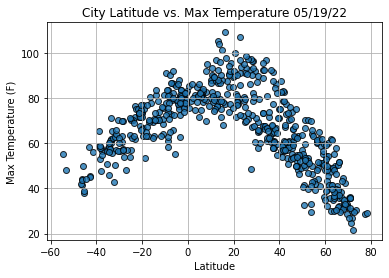

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

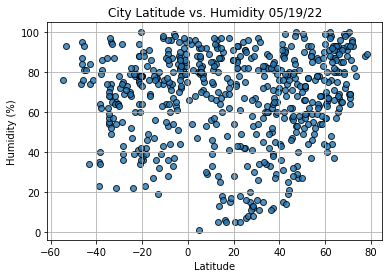

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

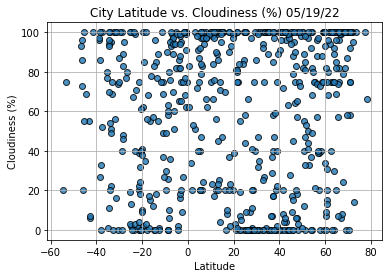

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

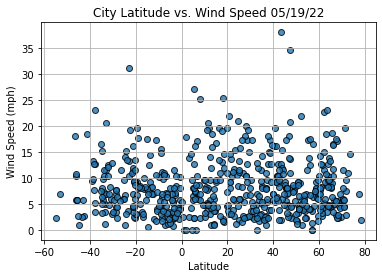

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()